In [630]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

# Problem 1:

In [813]:
lst = list(["A","U","G","C"]) #each letter represents Alanine, Glycine, Cysteine and Threonine.
n=100
String1 = "".join(random.choice(lst) for i in range(n))
String2 = "".join(random.choice(lst) for i in range(n))
seq1 = Seq(String1, generic_dna)
seq2 = Seq(String2, generic_dna)
print("Sequence 1=",seq1)
print("Sequence 2=",seq2)

Sequence 1= CACGAAUUCAGCCCCUGACUCUUUCAGGGGUUAAACGGGUCUCAUCCCCUACGCGGACAUGCAGCCACCCCUACCAUACUGACGCUGUCGCGCGGUCCAC
Sequence 2= UUUCGAUCCAAUCUGGGUCUAUGCCACUUUAAUUAUAGGUAUUUUUGACAUCCGAGUUGGAGGCAACCAAAUGGGCAUUAGUGAAUCGAGGACUCGCGAU


In [814]:
"""from Bio import SeqIO

with open("ls_orchid.fasta") as in_handle:
    record_iterator = SeqIO.parse(in_handle, "fasta")
    rec_one = next(record_iterator)
    rec_two = next(record_iterator)

seq1 = str(rec_one.seq).upper()
seq2 = str(rec_two.seq).upper()
seq2=seq2[:-13]"""

'from Bio import SeqIO\n\nwith open("ls_orchid.fasta") as in_handle:\n    record_iterator = SeqIO.parse(in_handle, "fasta")\n    rec_one = next(record_iterator)\n    rec_two = next(record_iterator)\n\nseq1 = str(rec_one.seq).upper()\nseq2 = str(rec_two.seq).upper()\nseq2=seq2[:-13]'

In [815]:
"""seq1='CAUGCCAG'
seq2='GAUACCAA'
print(len(seq1))
print(len(seq2))"""

"seq1='CAUGCCAG'\nseq2='GAUACCAA'\nprint(len(seq1))\nprint(len(seq2))"

In [816]:
seq1

Seq('CACGAAUUCAGCCCCUGACUCUUUCAGGGGUUAAACGGGUCUCAUCCCCUACGC...CAC', DNAAlphabet())

## Part 1.1:
Construct two sequences with equal length of 100 nt by choosing A, U, G, C randomly

In [817]:
l1=list(seq1)
l2=list(seq2)
xlist=[]
ylist=[]
for i in range(len(l1)):        
        for j in range(len(l2)):
            if(l1[i]==l2[j]):                
                xlist.append(i)
                ylist.append(j)

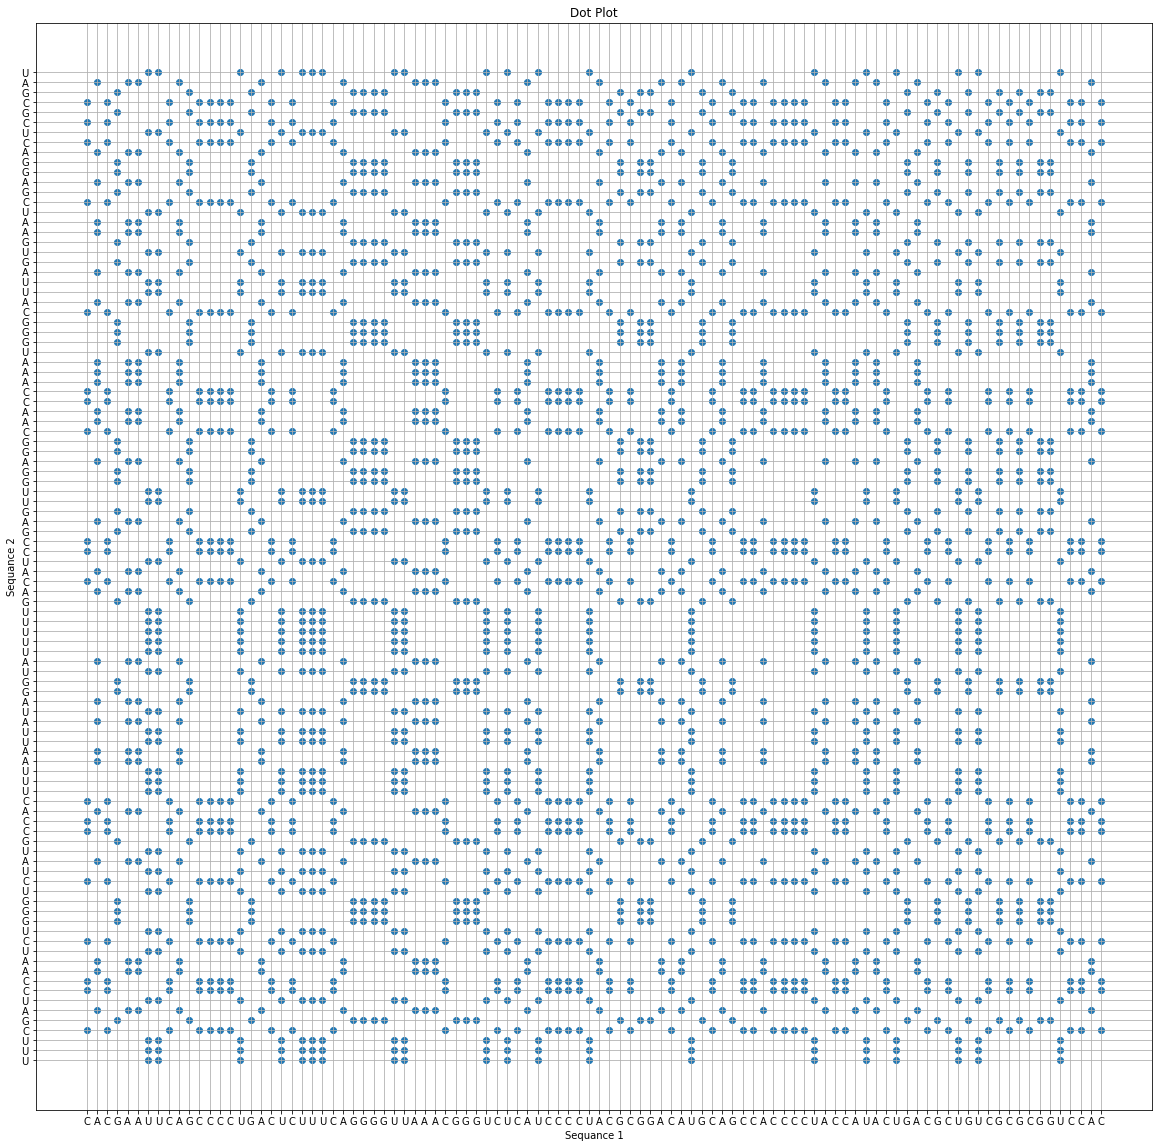

In [818]:
f = plt.figure(figsize=(n/5,n/5))
plt.scatter(xlist,ylist)

xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))


plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
plt.title("Dot Plot")
plt.grid()
plt.savefig('dotplot.jpg',dpi=300)
plt.show()

## Part 2:
Find the most similar region of the aligned sequences.

In [819]:
l1=list(seq1)
l2=list(seq2)
xlist=[]
ylist=[]
for i in range(len(l1)):        
            if(l1[i]==l2[i]):                
                xlist.append(i)                

In [820]:
def groupSequence(lst): 
    res = [[lst[0]]] 
  
    for i in range(1, len(lst)): 
        if lst[i-1]+1 == lst[i]: 
            res[-1].append(lst[i]) 
        else: 
            res.append([lst[i]]) 
    return res 

In [821]:
temp=[len(i) for i in groupSequence(xlist)]
maxpos = temp.index(max(temp))  

seq3=[seq1[i] for i in groupSequence(xlist)[maxpos]]
region="".join(seq3)

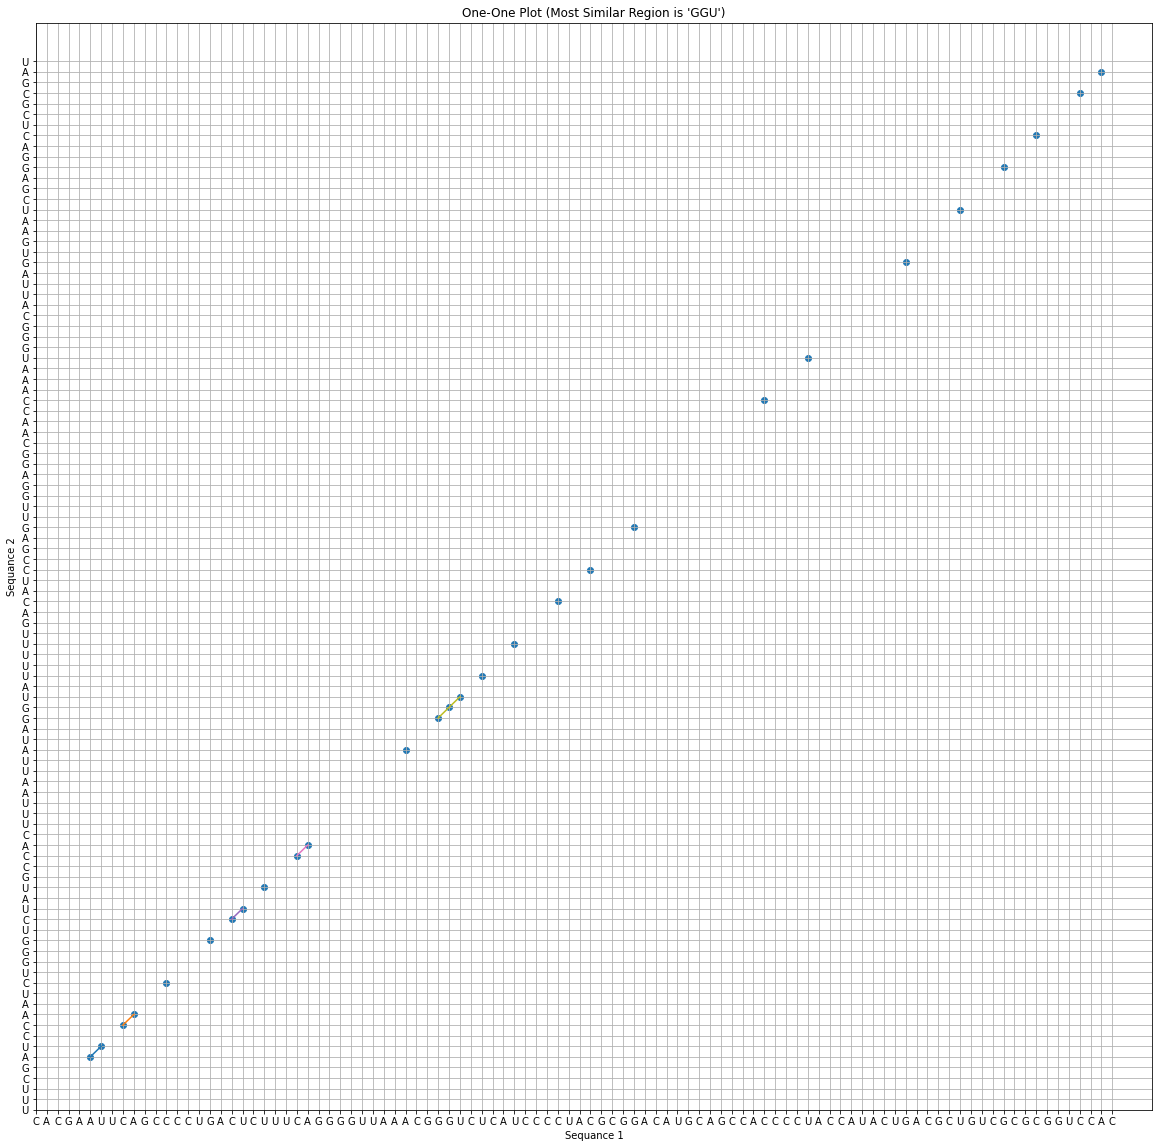

In [822]:
f = plt.figure(figsize=(n/5,n/5))
plt.scatter(xlist,xlist)

for i in groupSequence(xlist):    
    plt.plot(i,i)

xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))


plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
plt.title("One-One Plot (Most Similar Region is '{}')".format(region))
plt.grid()
plt.savefig('oneoneplot.jpg',dpi=300)
plt.show()

# Problem 2:

In [829]:
ws=10
thresold=5
l1=list(seq1)
l2=list(seq2)

seq11 = ["".join(l1[i:i+ws]) for i in range(0, len(l1)) if(len(l1[i:i+ws])==ws)] 
seq22 = ["".join(l2[i:i+ws]) for i in range(0, len(l2)) if(len(l2[i:i+ws])==ws)] 

print(seq11)
print(seq22)

['CACGAAUUCA', 'ACGAAUUCAG', 'CGAAUUCAGC', 'GAAUUCAGCC', 'AAUUCAGCCC', 'AUUCAGCCCC', 'UUCAGCCCCU', 'UCAGCCCCUG', 'CAGCCCCUGA', 'AGCCCCUGAC', 'GCCCCUGACU', 'CCCCUGACUC', 'CCCUGACUCU', 'CCUGACUCUU', 'CUGACUCUUU', 'UGACUCUUUC', 'GACUCUUUCA', 'ACUCUUUCAG', 'CUCUUUCAGG', 'UCUUUCAGGG', 'CUUUCAGGGG', 'UUUCAGGGGU', 'UUCAGGGGUU', 'UCAGGGGUUA', 'CAGGGGUUAA', 'AGGGGUUAAA', 'GGGGUUAAAC', 'GGGUUAAACG', 'GGUUAAACGG', 'GUUAAACGGG', 'UUAAACGGGU', 'UAAACGGGUC', 'AAACGGGUCU', 'AACGGGUCUC', 'ACGGGUCUCA', 'CGGGUCUCAU', 'GGGUCUCAUC', 'GGUCUCAUCC', 'GUCUCAUCCC', 'UCUCAUCCCC', 'CUCAUCCCCU', 'UCAUCCCCUA', 'CAUCCCCUAC', 'AUCCCCUACG', 'UCCCCUACGC', 'CCCCUACGCG', 'CCCUACGCGG', 'CCUACGCGGA', 'CUACGCGGAC', 'UACGCGGACA', 'ACGCGGACAU', 'CGCGGACAUG', 'GCGGACAUGC', 'CGGACAUGCA', 'GGACAUGCAG', 'GACAUGCAGC', 'ACAUGCAGCC', 'CAUGCAGCCA', 'AUGCAGCCAC', 'UGCAGCCACC', 'GCAGCCACCC', 'CAGCCACCCC', 'AGCCACCCCU', 'GCCACCCCUA', 'CCACCCCUAC', 'CACCCCUACC', 'ACCCCUACCA', 'CCCCUACCAU', 'CCCUACCAUA', 'CCUACCAUAC', 'CUACCAUACU', 'UACC

In [830]:
x=[]
y=[]
for i in range(len(seq11)):
    count=0
    for j in range(len(seq11[i])):
        #print(seq11[i][j],seq22[i][j])
        if(seq11[i][j]==seq22[i][j]):
           count+=1 
    if(count>=thresold):
        x.append(seq11.index(seq11[i]))
        y.append(seq22.index(seq22[i]))        
print(x)
print(y)

[3, 4, 5, 12, 15, 16, 17, 18, 32, 33, 34, 35, 36, 37]
[3, 4, 5, 12, 15, 16, 17, 18, 32, 33, 34, 35, 36, 37]


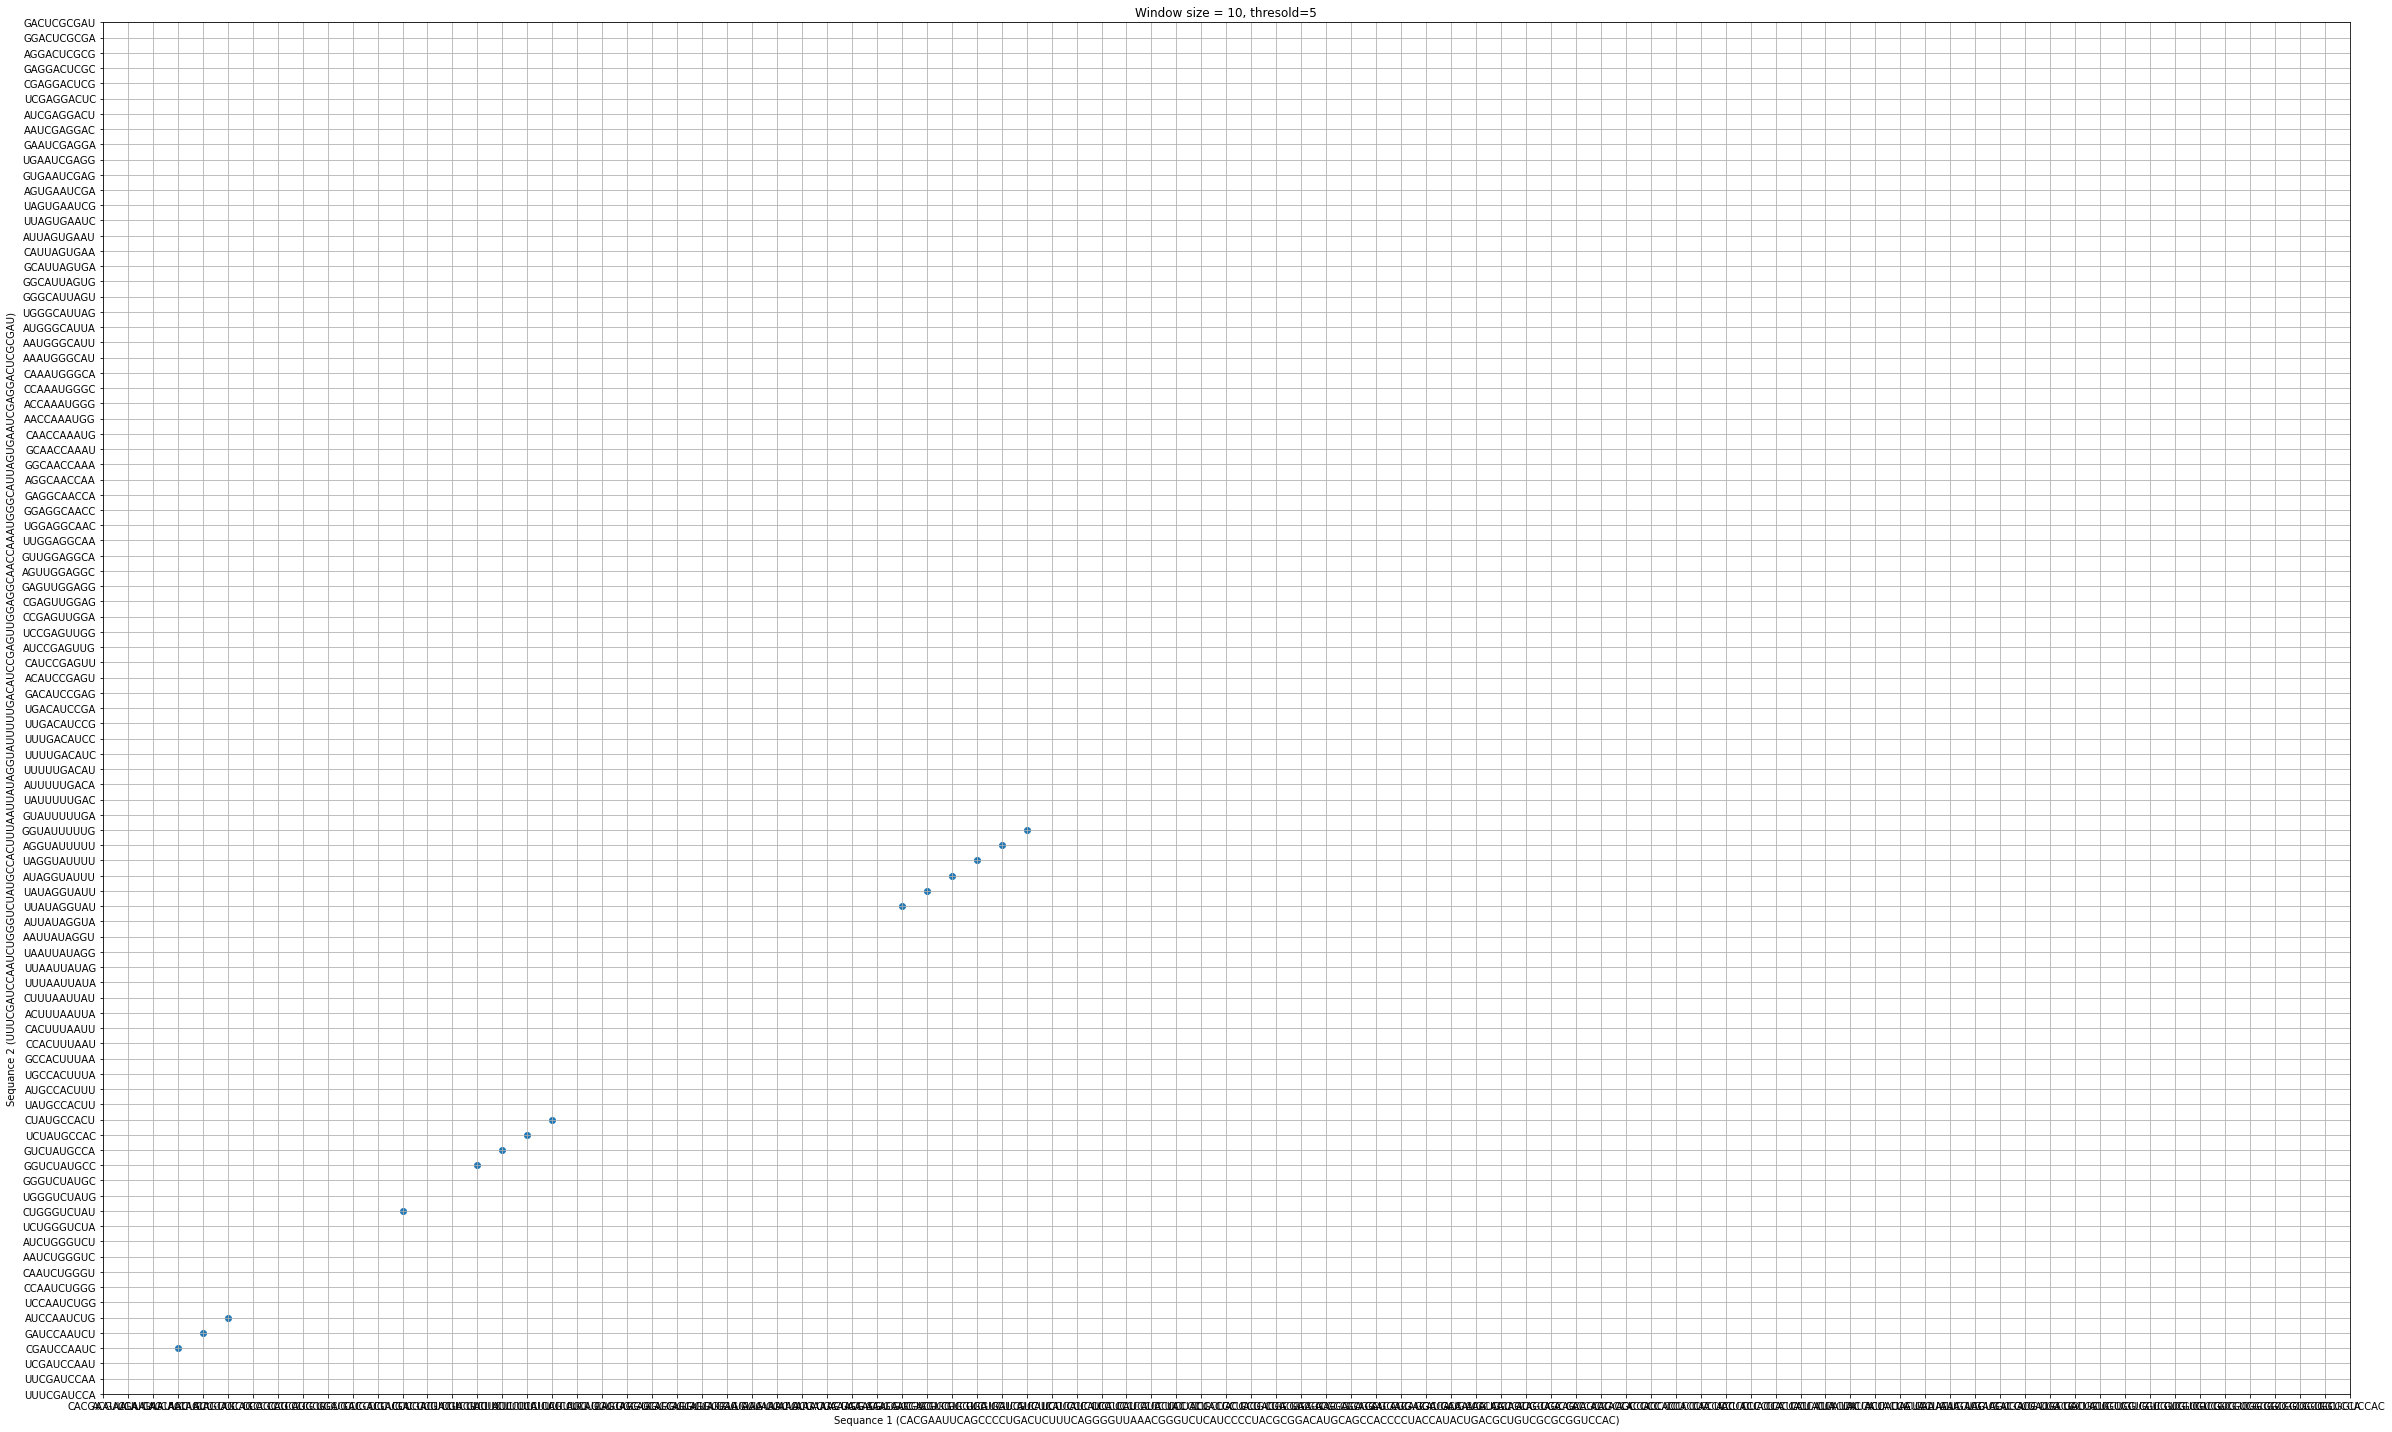

In [831]:
f = plt.figure(figsize=(n/3,n/5))
plt.scatter(x,y)

"""for i in groupSequence(xlist):    
    plt.plot(i,i)"""

xt=plt.xticks(np.arange(len(list(seq11))),list(seq11),rotation=0)
yt=plt.yticks(np.arange(len(list(seq22))),list(seq22))

plt.xlabel("Sequance 1 ({})".format(seq1))
plt.ylabel("Sequance 2 ({})".format(seq2))
plt.title("Window size = {}, thresold={}".format(ws,thresold))
plt.grid()
plt.tight_layout()
plt.savefig('oneoneplot2.jpg',dpi=300)
plt.show()                

In [708]:
x=np.array(xlist)
y=np.array(ylist)
print(x)
print(y)

[2 4 5 6]
[]


In [212]:
def checkval(x1,y1):
    c = np.where(y == y1)[0]
    for i in c:
        if(x1==x[i]):
            return True

In [213]:
def downseq():
    pair=[]
    for i in range(len(y)):

        x1=y[i]        
        temp=np.unique(x)[x[i]:]
        p2=[]
        for j in range(len(temp)):        
            #temp=x[i]
            if(x1-j>=0):
                #print(x1-j,temp[j])
                if(checkval(temp[j],x1-j)==True):
                    #print(temp[j],x1-j)

                    if(p2):
                        if(p2[-1][0]+1==temp[j]):
                            p2.append([temp[j],x1-j])    
                    else:                
                        p2.append([temp[j],x1-j])
        if(len(p2)>1):
            pair.append(p2)
            #if(j+1==x1-1):
            #    print(i,j,j,x1-1)

    return pair

In [214]:
def upseq():
    pair=[]
    for i in range(len(y)):

        x1=y[i]        
        temp=np.unique(x)[x[i]:]
        p2=[]
        for j in range(len(temp)):        
            if(x1+j>=0):
                if(checkval(temp[j],x1+j)==True):                
                    if(p2):
                        if(p2[-1][0]+1==temp[j]):
                            p2.append([temp[j],x1+j])    
                    else:                
                        p2.append([temp[j],x1+j])
        if(len(p2)>1):
            pair.append(p2)       
    return pair

In [215]:
def filterseq(pair):
    pair2=pair.copy()
    for i in range(1,len(pair)):
        for j in range(0,i):
            t1=np.array(pair[i]).flatten()
            t2=np.array(pair[j]).flatten()        
            if(set(t1).issubset(set(t2))):
                if pair[i] in pair2:                
                    pair2.remove(pair[i])  
    return pair2

In [216]:
pair=filterseq(downseq())
pair2=filterseq(upseq())
finalpair=pair+pair2

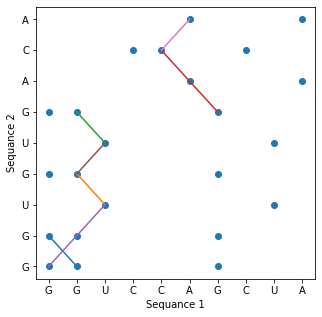

In [218]:
f = plt.figure(figsize=(5,5))
plt.scatter(xlist,ylist)

for i in range(len(finalpair)):
    x=np.array(finalpair[i]).flatten()
    xx=[x[i] for i in range(0,len(x),2)]
    yy=[x[i] for i in range(1,len(x),2)]  
    plt.plot(xx,yy)

xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))
#plt.xticks(range(len(seq1)))
#plt.yticks(range(len(seq2)))


plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
plt.savefig('dotplot.jpg',dpi=300)
plt.show()